# Time series prediction using LSTM

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Hackathons/Unilever Use Case/Test dataset v1.xlsx')

### Print the data
- First 5 rows only

In [0]:
df.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,7.446883,16.0,100.0,32.950,0.5150,8.226,0.013258,42744.256840,42.410000,49.091447,9.691794,2.87,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,11.677082,5.0,87.5,34.625,0.2700,7.473,0.009938,36290.439557,42.410000,49.057612,9.415938,2.87,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,0.102858,46.0,96.0,46.700,0.3900,8.001,0.007832,34852.141656,42.410000,49.367514,5.176684,2.87,1.834440,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,0.249055,48.0,100.0,49.650,0.3500,8.767,0.010034,24869.558988,43.543571,50.657634,6.088273,2.87,2.444000,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,13.338804,19.0,100.0,58.100,0.5025,9.277,0.009546,61675.321620,43.790000,50.625777,7.827112,1.87,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [0]:
df = df[['EQ']]
df.head()

,EQ
0,504.784933
1,490.226477
2,479.244686
3,489.057428
4,477.031994


### Drop all the rows with null values
- use dropna() method

In [0]:
df.dropna(inplace=True)

### Describe your dataframe
- use describe() method

In [0]:
df.describe()

,EQ
count,39.000000
mean,317.607462
std,117.566092
min,130.937361
25%,238.472603
50%,286.705586
75%,388.932161
max,546.053084


### Plot the dataframe
- use plot() method

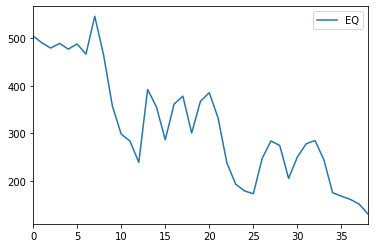

In [0]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

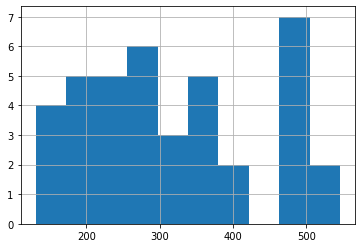

In [0]:
df.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [0]:
df.min()

130.9373608

In [0]:
df.max()

546.0530843

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0, 1))
train = ms.fit_transform(df)
#test = ms.transform(test)

### Print scaled train and test data
- print only first 5 values

In [0]:
train[:5]

array([[0.90058639],
       [0.86551556],
       [0.83906078],
       [0.86269935],
       [0.83373048]])

In [0]:
test[:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
X_train, y_train = create_seq_data(train)
#X_test, y_test = create_seq_data(test)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Print shape of data
- print shape of X_train and X_test

In [0]:
print(X_train.shape)

(38, 1, 1)


### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [0]:
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, LSTM
from tensorflow.python.keras import Sequential

model = Sequential()
model.add(LSTM(13, stateful=True, batch_input_shape=(1, 1, 1)))


model.add(Dense(1))

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')

### summarize your model
- use summary() method

In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (1, 13)                   780       
_________________________________________________________________
dense_9 (Dense)              (1, 1)                    14        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


### fit your model
- epochs: 50
- batch_size: 1

In [0]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1230
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0632
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0613
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 9/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 10/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 11/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 12/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 13/50
38/38 [==============================

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
train_pred = model.predict(X_train, batch_size=1)

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
train_pred = ms.inverse_transform(train_pred)
y_train = ms.inverse_transform([y_train])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
import math
from sklearn.metrics import mean_squared_error
train_score = math.sqrt(mean_squared_error(y_train[0], train_pred[:,0]))

In [0]:
print('Train Score: %.2f RMSE' % (train_score))

Train Score: 53.03 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [0]:
test_score = math.sqrt(mean_squared_error(y_test[0], test_pred[:,0]))

In [0]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

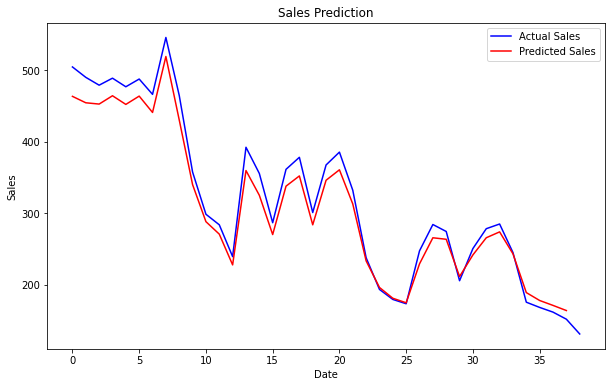

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.EQ, color='blue', label='Actual Sales')
plt.plot(train_pred[:,0] , color='red', label='Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [0]:
MAPE(y_train[0], train_pred[:,0])

13.51

# Best Model created very close mapping of the forecated trend with the actual. The best model prepared so far
